In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
COLORS = ["#C62828", "#FF5F52", "#8E0000", "#9C4DCC", "#38006B", "#3F51B5", "#757DE8", "#002984", "#388E3C", "#6ABF69", "#00600F", "#00E5FF"]
GCF = plt.gcf()
GCF.show()
POINT_COUNT = 100
CLUSTER_START_COUNT = 2
CLUSTER_END_COUNT = 12
X=0
Y=1

<Figure size 432x288 with 0 Axes>

In [3]:
def clusters_optimization(clusters_dimension):
    optimization = []
    for i in range(len(clusters_dimension)):
        prev_d = 0 if i == 0 else clusters_dimension[i - 1]
        curr_d = clusters_dimension[i]
        next_d = clusters_dimension[i] - 1 if i == len(clusters_dimension) - 1 else clusters_dimension[i + 1]
        optimization.append(abs((curr_d - next_d)/ (prev_d - curr_d)))
    return optimization

In [4]:
def vector_length(a_x, a_y, b_x, b_y):
    diff_x = a_x - b_x
    diff_y = a_y - b_y
    return math.sqrt(diff_x * diff_x + diff_y * diff_y)

In [5]:
def get_cluster_range(cluster, points):
    r = 0
    for i in range(len(points[X])):
        r += vector_length(points[X][i], points[Y][i], cluster[X], cluster[Y])
    return r

In [6]:
def get_range_for_all_clusters(clusters, points):
    r = 0
    for i in range(len(clusters[X])):
        r += get_cluster_range(points[i], [clusters[X][i], clusters[Y][i]])
    return r

In [7]:
def draw(points):
    i = 0
    for point in points:
        plt.plot(point[X], point[Y], 'ro', color=COLORS[i])
        i += 1
    GCF.canvas.draw()

In [8]:
def cluster_normal_points(radius, size):
    clusters = [[], []]
    for i in range(size):
        clusters[X].append(radius * math.cos(2 * i * math.pi / size))
        clusters[Y].append(radius * math.sin(2 * i * math.pi / size))
    return clusters

In [9]:
def make_clusters(clusters, points):
    cluster = 0
    temp = [[] for i in range(len(clusters[X]))]
    temp = list(map(lambda i: [[],[]], temp))
    for i in range(len(points[X])):
        distance = sys.maxsize
        for j in range(len(clusters[X])):
            v_length = vector_length(points[X][i], points[Y][i], clusters[X][j], clusters[Y][j])
            if (distance > v_length):
                distance = v_length
                cluster = j
        temp[cluster][X].append(points[X][i])
        temp[cluster][Y].append(points[Y][i])
    return temp

In [10]:
def clustering(points, cluster_amount, radius):
    old_diff = 0 
    diff = 1
    new_clusters = clusters = cluster_normal_points(cluster_amount, 3)
    point_cluster = []
    while diff - old_diff != 0:
        GCF.clf()
        point_cluster = make_clusters(new_clusters, points)
        old_diff = diff
        new_clusters = [[],[]]
        diff = 0
        for cl in point_cluster:
            new_clusters[X].append(sum(cl[X]) / len(cl[X]))
            new_clusters[Y].append(sum(cl[Y]) / len(cl[Y]))
        for i in range(len(new_clusters)):
            diff += vector_length(clusters[i][X], clusters[i][Y], new_clusters[i][X], new_clusters[i][Y])
        draw(point_cluster)
        plt.plot(new_clusters[X], new_clusters[Y], 'ro', color="gray")
    return point_cluster, new_clusters

ZeroDivisionError: float division by zero

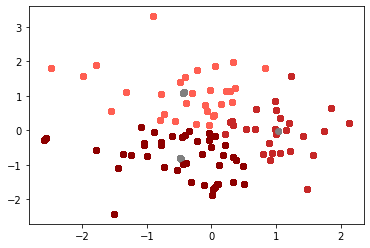

In [11]:

amount = CLUSTER_START_COUNT
points = np.random.randn(2, POINT_COUNT)
ranges = []
while(amount <= CLUSTER_END_COUNT):
    cluster_2_points, new_cluster = clustering(points, amount, 3)
    ranges.append(get_range_for_all_clusters(cluster_2_points, new_cluster))
    amount += 1
optimization = clusters_optimization(ranges)
best = max(optimization)
best_index = optimization.index(best)
clustering(points, best_index, 3)

plt.show()